<a href="https://colab.research.google.com/github/LAFernandez-2024info/proyecto-integrador2./blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: arme un dataframe de al menos 100 filas con datos random con apellido y nombre, nro  dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Artes", "Música", "Informática"
]

# Lista de apellidos y nombres (puedes ampliarla)
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Sánchez", "Pérez", "Gómez", "Díaz"]
nombres = ["Juan", "María", "Pedro", "Ana", "Luis", "Laura", "Carlos", "Sofía", "Diego", "Martina"]

# Crear un DataFrame vacío
df = pd.DataFrame(columns=["Apellido", "Nombre", "DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Generar 100 filas con datos aleatorios
for _ in range(100):
    apellido = random.choice(apellidos)
    nombre = random.choice(nombres)
    dni = np.random.randint(10000000, 99999999)  # DNI aleatorio (puedes ajustar el rango)
    materia = random.choice(materias)
    nota1 = np.random.randint(1, 11)  # Nota aleatoria entre 1 y 10
    nota2 = np.random.randint(1, 11)
    nota3 = np.random.randint(1, 11)
    faltas = np.random.randint(0, 15)  # Faltas aleatorias (puedes ajustar el rango)

    nueva_fila = pd.DataFrame({
        "Apellido": [apellido],
        "Nombre": [nombre],
        "DNI": [dni],
        "Materia Escolar": [materia],
        "Nota 1er Trimestre": [nota1],
        "Nota 2do Trimestre": [nota2],
        "Nota 3er Trimestre": [nota3],
        "Faltas a clases": [faltas]
    })
    df = pd.concat([df, nueva_fila], ignore_index=True)

# Mostrar el DataFrame
df

,Apellido,Nombre,DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Martínez,Sofía,55551061,Informática,2,1,1,13
1,Rodríguez,Diego,83435214,Artes,2,6,7,3
2,Díaz,Sofía,91426683,Historia,3,3,2,12
3,García,María,15649827,Ciencias Naturales,1,8,1,12
4,Fernández,Luis,24896264,Artes,1,6,10,9
...,...,...,...,...,...,...,...,...
95,Martínez,Martina,57310982,Ciencias Naturales,2,10,6,8
96,Rodríguez,Carlos,72818771,Lengua y Literatura,10,1,8,13
97,López,Laura,47338098,Lengua y Literatura,6,6,8,11
98,Díaz,Ana,24026941,Matemática,3,1,6,10


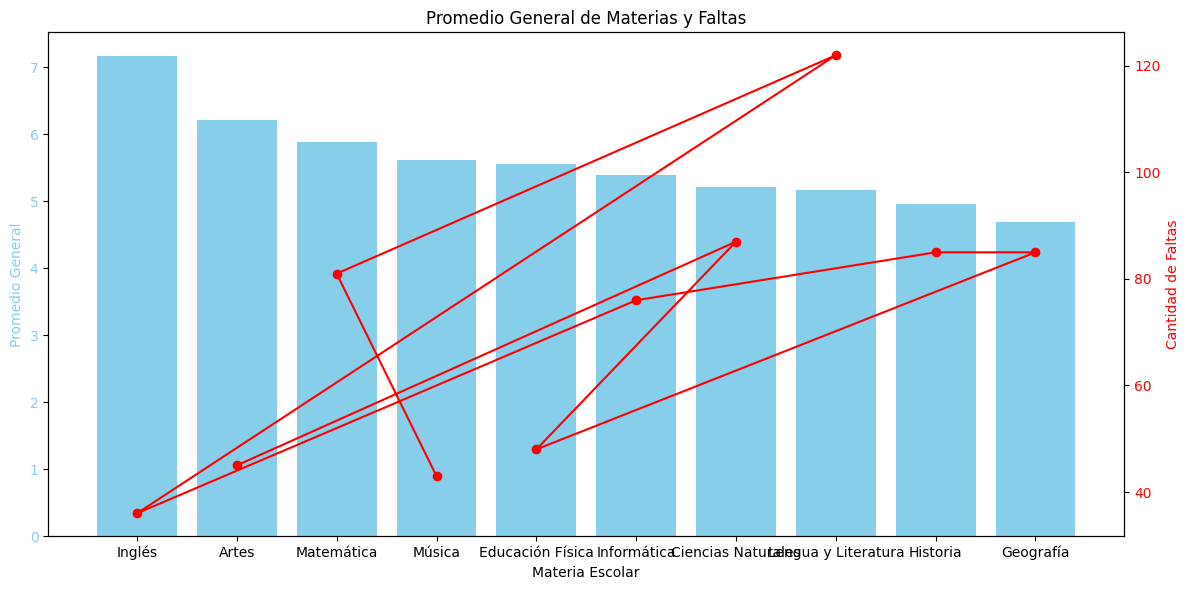

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_materias = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias por promedio de mayor a menor
promedio_materias_ordenado = promedio_materias.sort_values(ascending=False)

# Calcular la cantidad total de faltas por materia
faltas_materias = df.groupby('Materia Escolar')['Faltas a clases'].sum()

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para el promedio general de cada materia
ax1.bar(promedio_materias_ordenado.index, promedio_materias_ordenado.values, color='skyblue')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Promedio General de Materias y Faltas')

# Crear un segundo eje Y para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_materias.index, faltas_materias.values, color='red', marker='o')
ax2.set_ylabel('Cantidad de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Ajustar el espacio entre las barras y las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)